In [2]:
import numpy as np
import math
from matplotlib import pylab as plt
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
# import uproot
import time
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

from scipy import stats

In [3]:
# df5e = pd.read_pickle("electron5x5.pkl")
# print("read")
# df5g = pd.read_pickle("../PhS2_5x5/Gamma5x5.pkl")
# print("read")
df10e = pd.read_pickle("electron10x10.pkl")
print("read")
# df10g = pd.read_pickle("../PhS2_10x10/Gamma10x10.pkl")
# print("read")
# df20e = pd.read_pickle("electron20x20.pkl")
# print("read")
# df20g = pd.read_pickle("../PhS2_20x20/Gamma20x20.pkl")
# print("read")

read


In [4]:
df10e

,X,Y,dX,dY,Weight,Ekine
0,0.794922,13.781250,-0.136719,0.086121,0.0004,0.702637
1,-5.476562,-3.904297,-0.007820,-0.283203,0.0004,0.299805
2,-18.984375,-2.642578,0.099365,0.356445,0.0004,0.626465
3,59.906250,-11.468750,0.398682,0.154419,0.0004,0.495850
4,27.125000,-18.453125,0.428711,-0.176025,0.0004,0.572754
...,...,...,...,...,...,...
12501123,50.875000,24.234375,0.381592,0.604004,0.0004,2.775391
12501124,-66.375000,-5.589844,-0.828125,0.154175,0.0004,3.005859
12501125,2.441406,47.875000,-0.214966,0.758301,0.0004,1.698242
12501126,35.187500,7.343750,0.248169,0.427490,0.0004,3.117188


In [5]:
dfe10tot=df10e[['X','Y','dX','dY','Ekine','Weight']]

In [6]:
# ax = df10esub.plot.kde()


In [7]:
# df10eMir=df10esub[['X','Y','dX','dY']]

In [8]:
# df10eMir['Ekine']=df10esub['Ekine'].mul(-1)
# df10eMir

In [9]:
# dfe10tot=df10eMir.append(df10esub)

In [10]:
dfe10tot

,X,Y,dX,dY,Ekine,Weight
0,0.794922,13.781250,-0.136719,0.086121,0.702637,0.0004
1,-5.476562,-3.904297,-0.007820,-0.283203,0.299805,0.0004
2,-18.984375,-2.642578,0.099365,0.356445,0.626465,0.0004
3,59.906250,-11.468750,0.398682,0.154419,0.495850,0.0004
4,27.125000,-18.453125,0.428711,-0.176025,0.572754,0.0004
...,...,...,...,...,...,...
12501123,50.875000,24.234375,0.381592,0.604004,2.775391,0.0004
12501124,-66.375000,-5.589844,-0.828125,0.154175,3.005859,0.0004
12501125,2.441406,47.875000,-0.214966,0.758301,1.698242,0.0004
12501126,35.187500,7.343750,0.248169,0.427490,3.117188,0.0004


In [11]:
nparr=dfe10tot.to_numpy()


In [12]:
values=nparr.T

In [13]:
bandwidth=0.01

In [14]:

kde = stats.gaussian_kde(values, bw_method=bandwidth)
# density = kde(values)

# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# x, y, z = values
# ax.scatter(x, y, z, c=density)
# plt.show()

In [15]:
kde.factor

0.01

In [16]:
newsample = stats.gaussian_kde.resample(kde,12501128)


In [17]:
# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# kde2 = stats.gaussian_kde(newsample)
# density2 = kde2(newsample)
# x, y, z = newsample
# ax.scatter(x, y, z,c=density2)
# plt.show()
newdf=pd.DataFrame(newsample.T,columns=['X','Y','dX','dY','Ekine','Weight'])

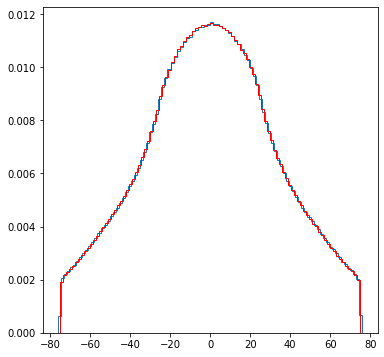

In [18]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(dfe10tot['X'],bins=100,histtype='step',color='red',density=True)

In [19]:
newdfsub=newdf[(newdf['Weight']>0)&(newdf['Ekine']>0)&(abs(newdf['X'])<75)&(abs(newdf['Y'])<75)]
newdfsub['dZ']=-1*pow(1.0-newdfsub['dX']*newdfsub['dX']-newdfsub['dY']*newdfsub['dY'],0.5)
# newdfsub.loc[:,'dZ']=-1*pow(1.0-newdfsub['dX']*newdfsub['dX']-newdfsub['dY']*newdfsub['dY'],0.5)
newdfsub["Z"]=-0.0000005
# newdfsub.loc[:,'Z']=-0.0000005
# newdfsub=newdfsub.assign(Z=-0.0000005)
newdfsub=newdfsub.dropna(axis='index')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


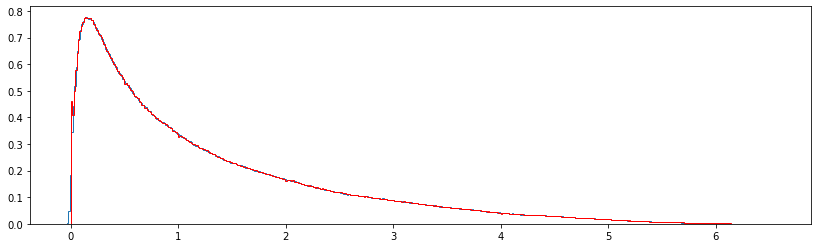

In [20]:
plt.figure(figsize=(14,4))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True)
_=plt.hist(dfe10tot['Ekine'],bins=500,histtype='step',color='red',density=True)

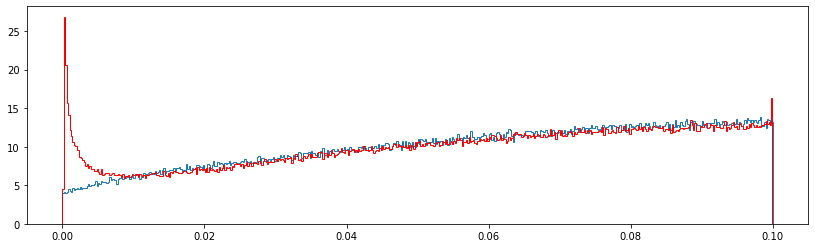

In [95]:
plt.figure(figsize=(14,4))
_=plt.hist(newdf['Ekine'],bins=500,histtype='step',density=True,range=(0,.1))
_=plt.hist(dfe10tot['Ekine'],bins=500,histtype='step',color='red',density=True,range=(0,.1))

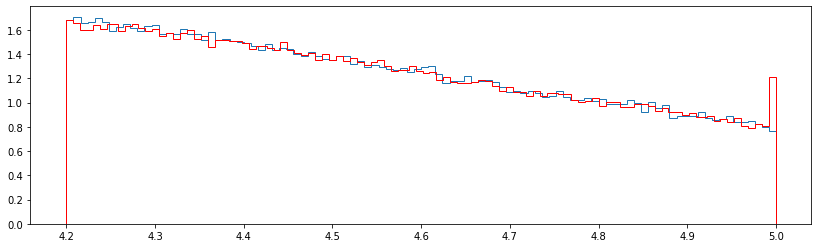

In [96]:
plt.figure(figsize=(14,4))
_=plt.hist(newdf['Ekine'],bins=100,histtype='step',density=True,range=(4.2,5.0))
_=plt.hist(dfe10tot['Ekine'],bins=100,histtype='step',color='red',density=True,range=(4.2,5.0))

In [97]:
newdfsub

,X,Y,dX,dY,Ekine,Weight,dZ,Z
0,-5.441533,11.735367,0.250250,-0.390847,3.825784,0.000505,-0.885784,-5.000000e-07
1,7.710749,-1.278370,0.083387,0.234971,1.871560,0.000480,-0.968419,-5.000000e-07
2,22.627440,10.580041,0.131514,0.072253,3.626151,0.000387,-0.988678,-5.000000e-07
4,-26.341098,-17.769982,-0.156032,-0.040156,1.959971,0.000289,-0.986935,-5.000000e-07
5,-45.637775,10.697110,-0.427865,0.009297,0.368511,0.000403,-0.903795,-5.000000e-07
...,...,...,...,...,...,...,...,...
12501123,-21.333546,-4.791412,-0.134795,-0.401397,0.258835,0.000536,-0.905931,-5.000000e-07
12501124,-21.789888,23.322147,-0.544958,0.153923,0.704656,0.000283,-0.824214,-5.000000e-07
12501125,54.287812,10.479057,0.443258,0.146649,0.141815,0.000439,-0.884317,-5.000000e-07
12501126,-39.675439,7.499522,-0.443749,-0.368895,1.387397,0.000407,-0.816703,-5.000000e-07


In [ ]:
nparr=df10esub.to_numpy()
values2=nparr.T

In [ ]:
kde2 = stats.gaussian_kde(values2,bw_method=bandwidth)
newsample2 = stats.gaussian_kde.resample(kde2,1000000)
kde2.factor

In [ ]:
newdf2=pd.DataFrame(newsample2.T,columns=['X','Y','dX','dY','Ekine'])

In [ ]:
plt.figure(figsize=(4,4))
_=plt.hist(newdf2['Ekine'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub['Ekine'],bins=100,histtype='step',color='red',density=True)

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf2['X'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub['X'],bins=100,histtype='step',color='red',density=True)

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf2['Y'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub['Y'],bins=100,histtype='step',color='red',density=True)

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf2['dX'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub['dX'],bins=100,histtype='step',color='red',density=True)

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf2['dY'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub['dY'],bins=100,histtype='step',color='red',density=True)

In [ ]:
# plt.figure(figsize=(6,6))
# _=plt.hist(newdf2['Weight'],bins=100,histtype='step',density=True)
# _=plt.hist(df10esub['Weight'],bins=100,histtype='step',color='red',density=True)

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf2[newdf2["X"]>60]['dX'],bins=100,histtype='step',density=True)
_=plt.hist(df10esub[df10esub["X"]>60]['dX'],bins=100,histtype='step',color='red',density=True)

In [ ]:
_=plt.hist2d(newdf['dX'],newdf['dY'],bins=(200,200))


In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf[newdf["X"]>60]['dX'],bins=100,histtype='step',density=True)
_=plt.hist(dfe10tot[dfe10tot["X"]>60]['dX'],bins=100,histtype='step',color='red',density=True)

In [ ]:
df10e_ekine=df10e[['Ekine','X']]

In [ ]:
df10e_ekine

In [ ]:
newdf3neg=df10e_ekine[['X']]
newdf3neg['Ekine']=df10e_ekine['Ekine'].mul(-1)
df10e_ekine=df10e_ekine.append(newdf3neg)
df10e_ekine

In [ ]:
nparr=df10e_ekine.to_numpy()
values3=nparr.T
kde3 = stats.gaussian_kde(values3,bw_method=0.0001)
newsample3 = stats.gaussian_kde.resample(kde3,10000000)
kde3.factor

In [ ]:
newdf3=pd.DataFrame(newsample3.T,columns=['Ekine','X'])
# newdf3neg=newdf3.mul(-1)
# newdf3neg
# newdf3=newdf3.append(newdf3neg)

In [ ]:
# plt.figure(figsize=(4,4))
fig,ax=plt.subplots(1,2,figsize=(8,4))
_=ax[0].hist(newdf3['Ekine'],bins=1000,histtype='step',density=True,range=(0,6.2))
_=ax[0].hist(df10e_ekine['Ekine'],bins=1000,histtype='step',color='red',density=True,range=(0,6.2))
_=ax[1].hist(newdf3['X'],bins=100,histtype='step',density=True,range=(0,6.2))
_=ax[1].hist(df10e_ekine['X'],bins=100,histtype='step',color='red',density=True,range=(0,6.2))

In [ ]:
# kde3.evaluate(newsample3)
fig,ax=plt.subplots(1,2,figsize=(12,6))
_=ax[0].hist2d(newdf3['Ekine'],newdf3['X'],bins=(1000,100),density=True)
_=ax[1].hist2d(df10e_ekine['Ekine'],df10e_ekine['X'],bins=(1000,100),density=True)


In [ ]:
plt.figure(figsize=(16,6))
# fig,ax=plt.subplots(1,2,figsize=(8,4))
_=plt.hist(newdf3['Ekine'],bins=1000,histtype='step',density=True,range=(0,0.21))
_=plt.hist(df10e_ekine['Ekine'],bins=500,histtype='step',color='red',density=True, range=(0,0.21))

In [ ]:
kde3.evaluate((1,1))